In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('train_imputed.csv')
train = train.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [5]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317
0,2987000.0,0.0,86400.0,68.500000,4.0,13926.0,441.0,150.0,1.0,142.0,...,0.0,0.000000,117.000000,0.000000,0.0000,0.0,0.0000,0.0000,0.0000,117.0
1,2987001.0,0.0,86401.0,29.000000,4.0,2755.0,404.0,150.0,2.0,102.0,...,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
2,2987002.0,0.0,86469.0,59.000000,4.0,4663.0,490.0,150.0,4.0,166.0,...,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
3,2987003.0,0.0,86499.0,50.000000,4.0,18132.0,567.0,150.0,2.0,117.0,...,0.0,50.000000,1758.000000,925.000000,354.0000,135.0,0.0000,0.0000,0.0000,1404.0
4,2987004.0,0.0,86506.0,50.000000,1.0,4497.0,514.0,150.0,2.0,102.0,...,1.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535.0,0.0,15811047.0,49.000000,4.0,6550.0,523.8,150.0,4.0,226.0,...,0.0,0.000000,47.950001,0.000000,47.9375,0.0,47.9375,47.9375,47.9375,0.0
590536,3577536.0,0.0,15811049.0,39.500000,4.0,10444.0,225.0,150.0,2.0,224.0,...,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
590537,3577537.0,0.0,15811079.0,30.953125,4.0,12037.0,595.0,150.0,2.0,224.0,...,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
590538,3577538.0,0.0,15811088.0,117.000000,4.0,7826.0,481.0,150.0,2.0,224.0,...,0.0,117.000000,2903.500000,117.000000,669.5000,117.0,317.5000,669.5000,317.5000,2234.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


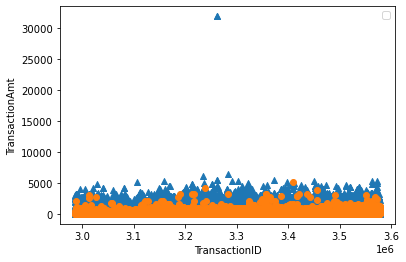

In [14]:
markers=['^', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = train[train['isFraud'] == i]['TransactionID']
    y_axis_data = train[train['isFraud'] == i]['TransactionAmt']
    plt.scatter(x_axis_data, y_axis_data, marker=marker) # , label=iris.target_names[i])
    
plt.legend()
plt.xlabel('TransactionID') # x축
plt.ylabel('TransactionAmt') # y축
plt.show()

In [16]:
# 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 근사
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
train_scaled = StandardScaler().fit_transform(train.drop('isFraud', axis=1))
train_scaled[:3]

array([[-1.73204787, -1.57798669, -0.27817409,  0.54724983,  0.82169536,
         0.50000348, -0.28139404, -2.18783738, -1.39246836, -1.67510929,
         0.24878566,  0.07895254, -0.36450573,  0.42424922, -0.09802136,
        -0.09226028, -0.05943762, -0.21605988, -0.11286903, -0.04614621,
        -0.05393871, -0.20871152, -0.05482608, -0.08736293, -0.04703356,
        -0.24380625, -0.14724653, -0.51061291, -0.68059264, -0.34873236,
        -0.27457163, -0.37211034, -0.62680058, -0.83526613, -0.84927258,
        -0.9209988 , -0.67359513, -0.51053597,  0.20614698, -1.65839063,
         0.12166876,  0.81690519,  0.78404882,  0.77677411,  0.01843174,
        -0.21327869, -0.2780308 ,  0.44943329,  0.33997401, -0.21981169,
        -0.27884365, -0.16885515, -0.20944898, -1.12123233, -1.09241207,
         0.9197947 ,  0.80783793, -0.39589661, -0.38627616, -0.40066195,
        -0.39668663,  0.45215844,  0.34731399, -0.41668198, -0.40119605,
        -0.79593274, -0.76794547, -0.43139479, -0.4

In [22]:
# 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공
from sklearn.decomposition import PCA

# PCA 클래스는 n_components라는 PCA로 변환할 차원의 수를 의미하는 생성 파라미터를 인자로 받음
pca = PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
train_pca

array([[-1.43771026, -0.29746746],
       [-0.48942128, -0.59020807],
       [-3.26772259, -0.35002999],
       ...,
       [-3.68202278, -0.9240219 ],
       [-1.15113049,  1.53713987],
       [-4.88375739, -0.40955065]])

In [27]:
# numpy결과값을 pandas dataframe으로 변경
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca1', 'pca2']
trainDF_pca = pd.DataFrame(train_pca, columns = pca_columns)
trainDF_pca['isFraud'] = train.isFraud
# trainDF_pca.isFraud.value_counts()

,pca1,pca2,isFraud
0,-1.437710,-0.297467,0.0
1,-0.489421,-0.590208,0.0
2,-3.267723,-0.350030,0.0
3,-2.371041,3.791391,0.0
4,2.458636,-0.471507,0.0
...,...,...,...
590535,-3.717633,0.047787,0.0
590536,-3.429998,-0.231535,0.0
590537,-3.682023,-0.924022,0.0
590538,-1.151130,1.537140,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


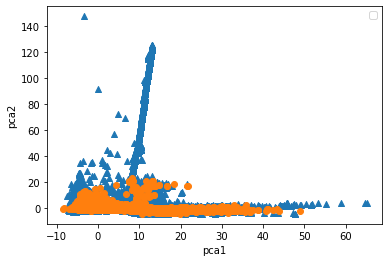

In [30]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = trainDF_pca[train['isFraud'] == i]['pca1']
    y_axis_data = trainDF_pca[train['isFraud'] == i]['pca2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker) # , label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [ ]:
# explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차이하는 변동성의 비율을 제공
print(pca.explained_variance_ratio_)